**Wrangle data about we rate dog**
1. Introduction 
2. Gather data
3. Assess Data 
4. Clean Data
5. Analyze and visuliza the data
6. References

# Introduction

**In this forth project, We  will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10.
We will get data from three sources.**


# Gather data

Gathering Data for this Project
Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. Which provide bu udacity
2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically.
3. Twitter API

In [90]:
#Install all libraries may we need it 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy 
import json
import requests
import time

%matplotlib inline

In [170]:
#Upload the archived data twitter enhanced which provide by UDACITY
df_twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [171]:
#Download the image_predictions tsv file which hosted on Udacity's servers
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open ('image_predictions.tsv' , mode='wb') as file:
    file.write(r.content)

df_image_predictions=pd.read_csv('image_predictions.tsv',sep='\t')

In [93]:
#Get data from twitter API 

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [94]:
#list of tweet_id from archived data
df_tweet_ids = df_twitter_enhanced['tweet_id']
len(df_tweet_ids)

2356

In [95]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)     


892420643555336193 _ [{'message': 'Rate limit exceeded', 'code': 88}]
892177421306343426 _ [{'message': 'Rate limit exceeded', 'code': 88}]
891815181378084864 _ [{'message': 'Rate limit exceeded', 'code': 88}]
891689557279858688 _ [{'message': 'Rate limit exceeded', 'code': 88}]
891327558926688256 _ [{'message': 'Rate limit exceeded', 'code': 88}]
891087950875897856 _ [{'message': 'Rate limit exceeded', 'code': 88}]
890971913173991426 _ [{'message': 'Rate limit exceeded', 'code': 88}]
890729181411237888 _ [{'message': 'Rate limit exceeded', 'code': 88}]
890609185150312448 _ [{'message': 'Rate limit exceeded', 'code': 88}]
890240255349198849 _ [{'message': 'Rate limit exceeded', 'code': 88}]
890006608113172480 _ [{'message': 'Rate limit exceeded', 'code': 88}]
889880896479866881 _ [{'message': 'Rate limit exceeded', 'code': 88}]
889665388333682689 _ [{'message': 'Rate limit exceeded', 'code': 88}]
889638837579907072 _ [{'message': 'Rate limit exceeded', 'code': 88}]
889531135344209921 _

In [8]:
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets'])


In [9]:
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [10]:
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

# Assess Data
We will assess the Quality issues with content and tidiness issues with structure 

In [327]:
#looking for the twitter enchanced data frame
df_twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [328]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [329]:
df_twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [330]:
df_twitter_enhanced[df_twitter_enhanced['rating_numerator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [331]:
len(df_twitter_enhanced[df_twitter_enhanced['rating_numerator'] <= 10])

901

In [334]:
df_twitter_enhanced[df_twitter_enhanced['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [335]:
df_twitter_enhanced['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Toby          7
Bailey        7
an            7
Buddy         7
Rusty         6
Scout         6
Dave          6
Milo          6
Leo           6
Oscar         6
Koda          6
Jack          6
Bella         6
Stanley       6
Jax           6
Oakley        5
           ... 
Bruiser       1
Vinscent      1
Geno          1
Sage          1
Tupawc        1
Bauer         1
Stefan        1
Thor          1
Bloop         1
Chase         1
Biden         1
Charl         1
Josep         1
Julio         1
Gordon        1
Georgie       1
Bluebert      1
Wiggles       1
Burt          1
Darby         1
Obi           1
Moofasa       1
Clybe         1
Brownie       1
Yoda          1
Darla         1
Berb          1
Kollin        1
this          1
Barry         1
Name: name, Length: 957,

In [336]:
df_twitter_enhanced.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
5,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
6,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
7,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
8,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
9,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


**In twitter enhanced table we show some issues:**

**Quality issues**
1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float
2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id have a null value
3. The numenoter has an inccoerct value such as zero
4. The denmenoter has an inccoerct value 
5. The name column has incooerct name such as a,an,the
6. In some columns the null value represented as non null
7. retweeted_status_timestamp and timestamp should be a time format istead of object

**Tidness issues**
1. Melt four dog stages as one columns instead of four

In [343]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [344]:
df_image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
1571,794983741416415232,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
348,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True
877,698342080612007937,https://pbs.twimg.com/ext_tw_video_thumb/69834...,1,boxer,0.883048,True,Saint_Bernard,0.030579,True,Staffordshire_bullterrier,0.012994,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
1946,862457590147678208,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,home_theater,0.496348,False,studio_couch,0.167256,False,barber_chair,0.052625,False
1463,778396591732486144,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True
1423,772117678702071809,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,1,Labrador_retriever,0.217821,True,beagle,0.157677,True,golden_retriever,0.127726,True


In [345]:
df_image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [346]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [347]:
#Number of non dogs
len(df_image_predictions[(df_image_predictions['p1_dog'] == False ) & (df_image_predictions['p2_dog'] == False) & (df_image_predictions['p3_dog'] == False)])

324

**The image prediction table:**

Quality issues
1. p1, p2, and p3 have incorrect writing (capital and small,underscors and dashes)

Tidiness issues
2. There are a 324 non dog, so we need to remove it 


In [348]:
#Read about API data
df_api_data.head()

,tweet_id,favorites,retweets
0,892420643555336193,34640,7225
1,892177421306343426,30027,5416
2,891815181378084864,22599,3576
3,891689557279858688,37908,7440
4,891327558926688256,36194,7985


In [349]:
#Number of rows and columns
df_api_data.shape

(874, 3)

In [350]:
#Random looking 
df_api_data.sample(10)

,tweet_id,favorites,retweets
329,832032802820481025,17209,4429
137,864197398364647424,27354,7811
669,787810552592695296,8387,2935
64,879492040517615616,21210,2722
175,856543823941562368,15220,2621
706,782722598790725632,16743,5181
134,865006731092295680,25659,6848
823,766078092750233600,0,2501
546,802323869084381190,15796,5654
262,840696689258311684,11764,911


In [351]:
#Describe the API data
df_api_data.describe()

,tweet_id,favorites,retweets
count,8.740000e+02,874.000000,874.000000
mean,8.201744e+17,13313.168192,4479.921053
std,3.687405e+16,13963.292104,5051.060558
min,7.588287e+17,0.000000,1.000000
25%,7.896066e+17,5134.500000,1862.000000
50%,8.185627e+17,10160.500000,3057.000000
75%,8.482133e+17,18719.000000,5248.750000
max,8.924206e+17,127310.000000,53329.000000


In [352]:
#Data type of all columns
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 3 columns):
tweet_id     874 non-null int64
favorites    874 non-null int64
retweets     874 non-null int64
dtypes: int64(3)
memory usage: 20.6 KB


## Cleaning data 

Cleaning data is the third step in wrangle data
We collect all issues:

| Issue | DataFrame | Issue Kind |
| :--- | --- | --- |
| in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id have a null value | Archived twitter | Quality |
|The denmenoter has an inccoerct value | Archived twitter | Quality |
|The numenoter has an inccoerct value such as zero| Archived twitter | Quality |
|The name column has incooerct name such as a,an,the | Archived twitter | Quality |
|  In some columns the null value represented as non null | Archived twitter | Quality |
| retweeted_status_timestamp and timestamp should be a time format istead of object | Archived twitter | Quality |
| p1, p2, and p3 have incorrect writing (capital and small,underscors and dashes) | image_predictions | Quality |
|Melt four dog stages as one columns instead of four | Archived twitter | Tidness |
| Here are a 324 non dog, so we need to remove it  | image_predictions | 

In [353]:
#lets get started,by copying the data to do the cleaning process
twitter_enhanced_clean = df_twitter_enhanced.copy()
image_predictions_clean=df_image_predictions.copy()
api_data_clean=df_api_data.copy()

## General

**Define**

All data frames here have the common column 'tweet_id', so the perfect way to make the analyze easy it joining together

**Code**

In [386]:
df_merge = pd.merge(pd.merge(twitter_enhanced_clean,image_predictions_clean, how="inner",on='tweet_id'),api_data_clean,how='inner',on='tweet_id')

**Test**

In [387]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 718
Data columns (total 30 columns):
tweet_id                      719 non-null int64
in_reply_to_status_id         4 non-null float64
in_reply_to_user_id           4 non-null float64
timestamp                     719 non-null object
source                        719 non-null object
text                          719 non-null object
retweeted_status_id           65 non-null float64
retweeted_status_user_id      65 non-null float64
retweeted_status_timestamp    65 non-null object
expanded_urls                 719 non-null object
rating_numerator              719 non-null int64
rating_denominator            719 non-null int64
name                          719 non-null object
doggo                         719 non-null object
floofer                       719 non-null object
pupper                        719 non-null object
puppo                         719 non-null object
jpg_url                       719 non-null object
i

## Quality Issues

**Define**

(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) have alot of null values,so we will remove it

**Code**

In [388]:
df_merge.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id',
'in_reply_to_user_id'], axis=1, inplace=True)

**Test**

In [389]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 718
Data columns (total 25 columns):
tweet_id              719 non-null int64
timestamp             719 non-null object
source                719 non-null object
text                  719 non-null object
expanded_urls         719 non-null object
rating_numerator      719 non-null int64
rating_denominator    719 non-null int64
name                  719 non-null object
doggo                 719 non-null object
floofer               719 non-null object
pupper                719 non-null object
puppo                 719 non-null object
jpg_url               719 non-null object
img_num               719 non-null int64
p1                    719 non-null object
p1_conf               719 non-null float64
p1_dog                719 non-null bool
p2                    719 non-null object
p2_conf               719 non-null float64
p2_dog                719 non-null bool
p3                    719 non-null object
p3_conf            

**Define**

The denmenoter has an inccoerct value, all value must be 10

**Code**

In [390]:
df_merge['rating_denominator'].value_counts()

10    717
70      1
7       1
Name: rating_denominator, dtype: int64

In [391]:
df_merge.loc[df_merge.rating_denominator != 10] = 10

**Test**

In [392]:
df_merge['rating_denominator'].describe()

count    719.0
mean      10.0
std        0.0
min       10.0
25%       10.0
50%       10.0
75%       10.0
max       10.0
Name: rating_denominator, dtype: float64

**Define**

The rating rating_numerator has an inccoerct value, we will remove the values greater than 25 "outliers

**Code**

In [393]:
df_merge.drop(df_merge.loc[df_merge['rating_numerator']> 25].index, inplace=True)

**Test**

In [394]:
df_merge['rating_numerator'].value_counts()

12    264
13    221
11    137
10     48
14     35
8       2
7       2
5       2
15      1
9       1
6       1
4       1
3       1
0       1
Name: rating_numerator, dtype: int64

**Define**

Replace the incooerct name such as a,an,the with None and convert non as null value

**Code**

In [395]:
#Converting the incorrect name to None
df_merge['name'] = df_merge['name'].replace(['a',' the','an',10],'None')


**Test**

In [396]:
df_merge['name'].value_counts()

None        143
Penny         6
Charlie       6
Tucker        6
Bo            6
Dave          4
Loki          4
Rusty         4
Scout         4
Cooper        4
Stanley       4
Winston       4
Bailey        4
Daisy         4
Jeffrey       3
Jack          3
Oakley        3
Clark         3
Lola          3
Finn          3
Bruce         3
Boomer        3
Bear          3
Alfie         3
Oliver        3
Paisley       3
Koda          3
Toby          3
Lucy          3
Leo           3
           ... 
Solomon       1
Alfy          1
Beau          1
Sailer        1
Carbon        1
Rupert        1
Chipson       1
Kuyu          1
Mutt          1
Lou           1
Barney        1
Jarvis        1
Wishes        1
Tuck          1
Sophie        1
Tycho         1
Olivia        1
Mauve         1
Heinrich      1
Callie        1
Rose          1
Kenny         1
one           1
Tom           1
Tito          1
Brandi        1
Roscoe        1
Brat          1
Misty         1
Benedict      1
Name: name, Length: 422,

**Define**

Convert the "None' in columns to null values 

**Code**

In [397]:
df_merge = df_merge.replace('None', np.nan)

**Test**

In [398]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 718
Data columns (total 25 columns):
tweet_id              717 non-null int64
timestamp             717 non-null object
source                717 non-null object
text                  717 non-null object
expanded_urls         717 non-null object
rating_numerator      717 non-null int64
rating_denominator    717 non-null int64
name                  574 non-null object
doggo                 59 non-null object
floofer               6 non-null object
pupper                52 non-null object
puppo                 20 non-null object
jpg_url               717 non-null object
img_num               717 non-null int64
p1                    717 non-null object
p1_conf               717 non-null float64
p1_dog                717 non-null object
p2                    717 non-null object
p2_conf               717 non-null float64
p2_dog                717 non-null object
p3                    717 non-null object
p3_conf             

**Define**

Convert the data type of timestamp columns to date format. retweeted_status_timestamp was cleaned

**Code**

In [399]:
df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'])

**Test**

In [400]:
print (df_merge['timestamp'].dtypes)

datetime64[ns]


**Define**

Rewrite the p1, p2, and p3 name in correct way (starting wih capital) and replace the underscore, dash with space

**Code**

In [401]:
#Repalce the underscore and dash with space
df_merge[['p1','p2','p3']] = df_merge[['p1','p2','p3']].replace('_', ' ', regex=True)
df_merge[['p1','p2','p3']] = df_merge[['p1','p2','p3']].replace('-', ' ', regex=True)

In [402]:
#Capitalized the first letter in the names
df_merge['p1'] = df_merge['p1'].str.title()
df_merge['p2'] = df_merge['p2'].str.title()
df_merge['p3'] = df_merge['p3'].str.title()

**Test**

In [403]:
df_merge[['p1','p2','p3']].sample(20)

,p1,p2,p3
185,Cardigan,Boston Bull,Doormat
41,Chow,Tibetan Mastiff,Newfoundland
121,Lakeland Terrier,Airedale,Teddy
462,Chow,Golden Retriever,Pomeranian
183,Sea Lion,Mink,Otter
133,Lakeside,Dock,Canoe
218,Staffordshire Bullterrier,American Staffordshire Terrier,Boston Bull
322,Samoyed,Malamute,Kuvasz
361,Tibetan Mastiff,Tibetan Terrier,Otterhound
531,Chow,Cougar,Pomeranian


## Tidiness Issues

**Define**

Remove the non dogs, non dog has value(p1_dog = false & p2_dog = false & p3_dog=false)

**Code**

In [404]:
df_merge.drop(df_merge[(df_merge['p1_dog'] == False ) & (df_merge['p2_dog'] == False) & (df_merge['p3_dog'] == False)].index,inplace=True)


**Test**

In [405]:
len(df_merge[(df_merge['p1_dog'] == False ) & (df_merge['p2_dog'] == False) & (df_merge['p3_dog'] == False)])

0

**Define**

Remove unnecessary columns in df_merge that unused in visulize

**Code**

In [406]:
#Drop the columns that we didn't use in analysis
df_merge.drop(['img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

**Test**

In [407]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 718
Data columns (total 18 columns):
tweet_id              636 non-null int64
timestamp             636 non-null datetime64[ns]
source                636 non-null object
text                  636 non-null object
expanded_urls         636 non-null object
rating_numerator      636 non-null int64
rating_denominator    636 non-null int64
name                  527 non-null object
doggo                 51 non-null object
floofer               6 non-null object
pupper                44 non-null object
puppo                 19 non-null object
jpg_url               636 non-null object
p1                    634 non-null object
p1_conf               636 non-null float64
p1_dog                636 non-null object
favorites             636 non-null int64
retweets              636 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(11)
memory usage: 94.4+ KB


**Define**

Melt the dogs stages from 4 coulmns to one 

**Code**

In [408]:
#Convert the columns stages from four columns to one
    
df_merge = pd.melt(df_merge, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name','jpg_url','p1','p1_conf','p1_dog','favorites','retweets'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'stage', value_name = 'dog_stage')

**Test**

In [409]:
df_merge['dog_stage'].value_counts()

doggo      49
pupper     42
puppo      17
10          8
floofer     4
Name: dog_stage, dtype: int64

In [411]:
#Delete the rows with value 10 
df_merge.drop(df_merge[(df_merge['dog_stage'] == 10 )].index,inplace=True)


In [412]:
#Check out the above code
df_merge['dog_stage'].value_counts()

doggo      49
pupper     42
puppo      17
floofer     4
Name: dog_stage, dtype: int64

In [413]:
#Saving the merge data as csv extension
df_merge.to_csv('df_merge.csv',index=False)

## Analyzing the data

After wrangle data we will looking out of the data and noting the important points

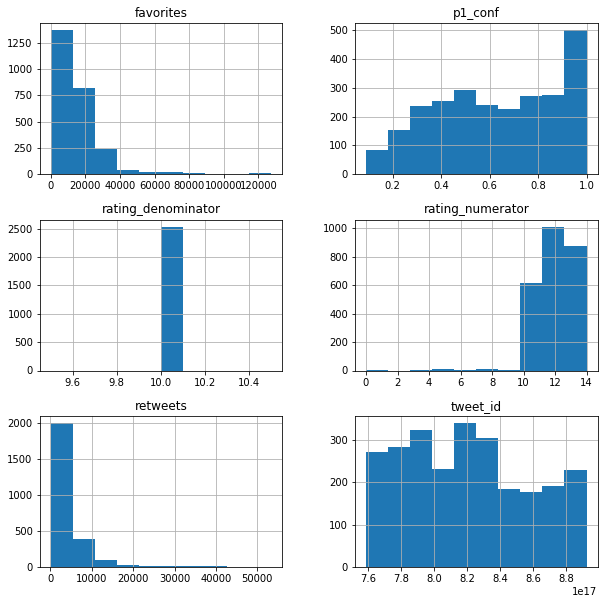

In [414]:
#Genreal look
df_merge.hist(figsize=(10,10));

Text(0.5,1,'Most Dogs Breeds')

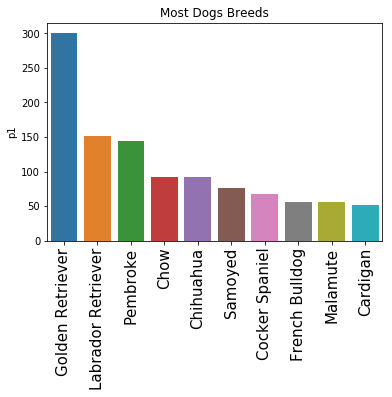

In [415]:
#looking for most dog breeds
ax = sns.barplot(x = df_merge['p1'].value_counts()[0:10].index,
            y =df_merge['p1'].value_counts()[0:10],
            data = df_merge);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.title("Most Dogs Breeds")


In [416]:
df_na=df_merge.loc[df_merge['p1'] == 'Golden Retriever']
df_na['jpg_url'].head(1)

13    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
Name: jpg_url, dtype: object

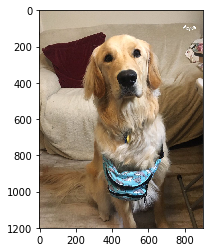

In [417]:
#View image of the "Golden Retiever Dog"

from PIL import Image
from io import BytesIO
r1 = requests.get(' https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg')
im = Image.open(BytesIO(r1.content))

plt.imshow(im)
plt.show()



In [418]:
df_merge['user_created_at_year_month'] = df_merge['timestamp'].dt.strftime('%Y-%m')

Text(0,0.5,'Retweets counts')

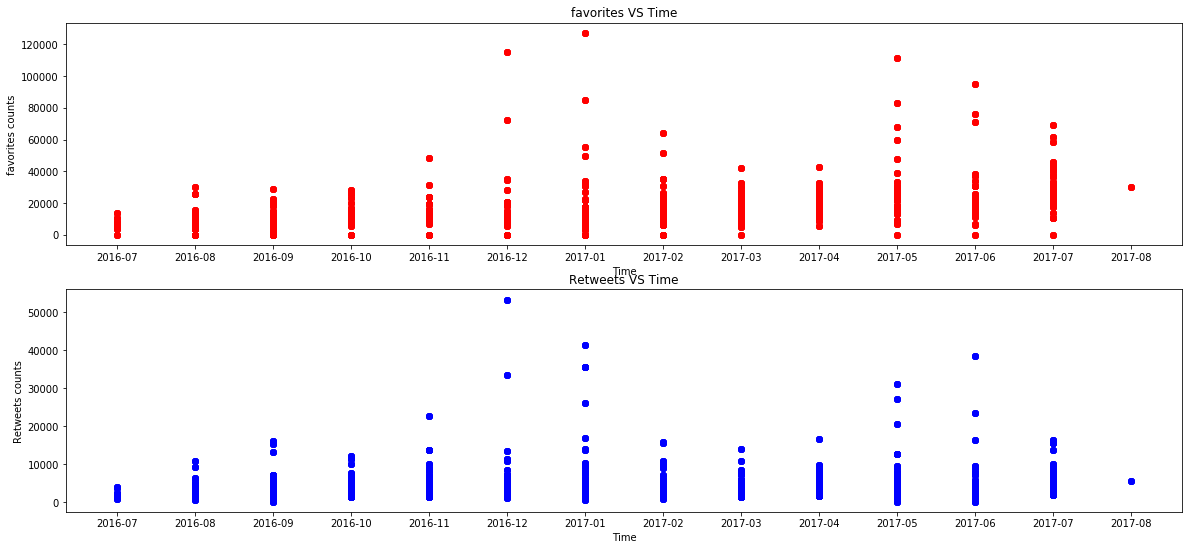

In [419]:
f = plt.figure(figsize=(20,9))
ax = f.add_subplot(211)

ax2 = f.add_subplot(212)

ax.scatter(df_merge['user_created_at_year_month'], df_merge['favorites'], color='red')

ax2.scatter(df_merge['user_created_at_year_month'], df_merge['retweets'], color='blue')

ax.set_title('favorites VS Time')
ax.set_xlabel('Time')
ax.set_ylabel('favorites counts')
ax2.set_title('Retweets VS Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Retweets counts')

Text(0.5,1,'Dogs Stage distribution')

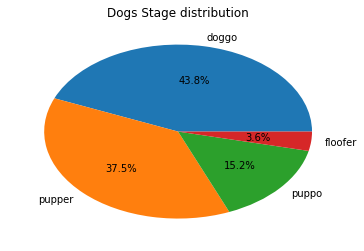

In [420]:
#View the percentage of dog stage
sorted_counts = df_merge['dog_stage'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,autopct='%1.1f%%');
plt.title('Dogs Stage distribution')

**Ploting the dog breed predection rating**

In [432]:
#Plot a dog breed with a mean rating
df_merge['rating']=df_merge['rating_numerator']/df_merge['rating_denominator']
mean_rating = df_merge.groupby('p1')['rating'].mean().sort_values(ascending=False)

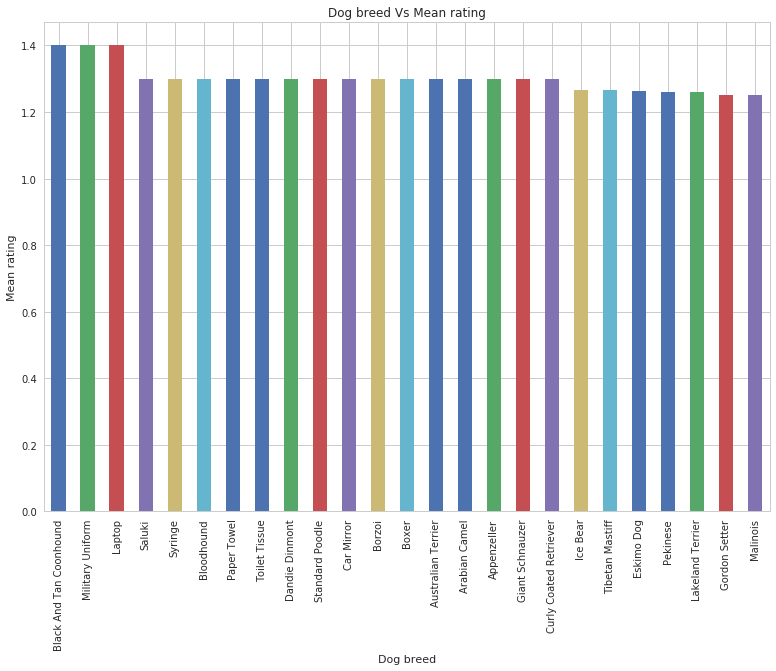

In [433]:
largest_mean_rating_predictions = mean_rating.nlargest(25)
plt.figure(figsize = [13,9])
largest_mean_rating_predictions.plot(kind='bar');
plt.xlabel('Dog breed');
plt.ylabel('Mean rating');
plt.title('Dog breed Vs Mean rating');

## Conclusion

1. From above visulization we looking for the most dog breed population 
2. We looking for the rating of each dog breeds
3. We look the most populat stages
4. The count of favourates and retweets during the time


## Refrences

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python
https://stackoverflow.com/questions/46429088/how-to-view-an-image-with-matplotlib-when-using-requests-getimage-url
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axes_margins.html
https://pandas.pydata.org/docs/reference/api/pandas.melt.html
https://pbpython.com/pandas_dtypes.html
https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition/31512025
https://github.com/maysazqarqaz/WeRateDogs-Data-Wrangling/blob/main/wrangle_act.ipynb
